In [1]:
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import gspread

In [2]:
df = pd.read_excel("tripadvisor_reviews.xlsx")

In [3]:
df.head()

,Name,Address,Contributions,Likes,Ratings,Headline,Content
0,motorcar1,"Dublin, Ireland","8,111",0,5.0,Nixon Museum and library,Visited here during US trip 2022. A pleasant p...
1,Kathy D,NaN,0,0,5.0,Peacemaker,The wonderful legacy of Nixon was so wonderful...
2,dan p,"Parkland, FL",114,0,4.0,Nixon Library and Museum,Excellent presentation of the Nixon years. Des...
3,virginia,"Visalia, CA",4,0,4.0,Totally worth it!,My girls are 16 & 14. It was great to see how ...
4,TulaKitty,"Santa Rosa, CA",316,0,5.0,Definitely worth your time,This is our second presidential library that w...


In [4]:
SA_model = spacy.load('en_core_web_sm')

SA_model.add_pipe("spacytextblob")

In [5]:
# Create lists to store the results
polarity_list = []
subjectivity_list = []
sentiment_assessments_list = []

# Iterate over the content column in the DataFrame
for row in df['Content']:
    doc = SA_model(row)

    # Get the sentiment polarity and subjectivity
    polarity = doc._.blob.polarity
    subjectivity = doc._.blob.subjectivity

    # Get the sentiment assessments
    sentiment_assessments = doc._.blob.sentiment_assessments.assessments

    # Append the results to the respective lists
    polarity_list.append(polarity)
    subjectivity_list.append(subjectivity)
    sentiment_assessments_list.append(sentiment_assessments)

# Create a new DataFrame from the results
results_df = pd.DataFrame({
    'Polarity': polarity_list,
    'Subjectivity': subjectivity_list,
    'Sentiment Assessments': sentiment_assessments_list
})

# Merge the sentiment scores DataFrame with the original DataFrame based on the row index
merged1_df = df.join(results_df)
# Print the results DataFrame
print(merged1_df)

             Name            Address Contributions  Likes Ratings  \
0       motorcar1    Dublin, Ireland         8,111      0     5.0   
1         Kathy D                NaN             0      0     5.0   
2           dan p       Parkland, FL           114      0     4.0   
3        virginia        Visalia, CA             4      0     4.0   
4       TulaKitty     Santa Rosa, CA           316      0     5.0   
...           ...                ...           ...    ...     ...   
1038  sheagoodbye           New York            34      2     4.0   
1039    Otter1959  Chicago, Illinois             2      3     4.0   
1040   museumgoer    Baton Rouge, LA            94      7     5.0   
1041  Culture5354           Reno, NV             1     10     4.0   
1042    Not found                NaN           NaN      1     Not   

                                               Headline  \
0                              Nixon Museum and library   
1                                           Peacemake

In [6]:
# Export the results_df DataFrame to an Excel file
merged1_df.to_excel("sentiment_results_tripadvisor.xlsx", index=False)

In [7]:
from IPython.display import FileLink

# Specify the filename and create a download link for trip advisor
excel_filename = "sentiment_results_tripadvisor.xlsx"
display(FileLink(excel_filename))

C:\Users\naren\OneDrive\Desktop\Nixon library Project\sentiment_results_tripadvisor.xlsx

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [9]:
#Printing the shape of the data frame
print(df.shape)

(1043, 7)


In [10]:
#Basic info of both the data sets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1043 non-null   object
 1   Address        889 non-null    object
 2   Contributions  1042 non-null   object
 3   Likes          1043 non-null   int64 
 4   Ratings        1043 non-null   object
 5   Headline       1043 non-null   object
 6   Content        1043 non-null   object
dtypes: int64(1), object(6)
memory usage: 57.2+ KB


In [11]:
df.describe()

,Likes
count,1043.000000
mean,0.853308
std,1.439288
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,30.000000


In [12]:
#Looking at headers again as I am starting my analysis here
df.head()

,Name,Address,Contributions,Likes,Ratings,Headline,Content
0,motorcar1,"Dublin, Ireland","8,111",0,5.0,Nixon Museum and library,Visited here during US trip 2022. A pleasant p...
1,Kathy D,NaN,0,0,5.0,Peacemaker,The wonderful legacy of Nixon was so wonderful...
2,dan p,"Parkland, FL",114,0,4.0,Nixon Library and Museum,Excellent presentation of the Nixon years. Des...
3,virginia,"Visalia, CA",4,0,4.0,Totally worth it!,My girls are 16 & 14. It was great to see how ...
4,TulaKitty,"Santa Rosa, CA",316,0,5.0,Definitely worth your time,This is our second presidential library that w...


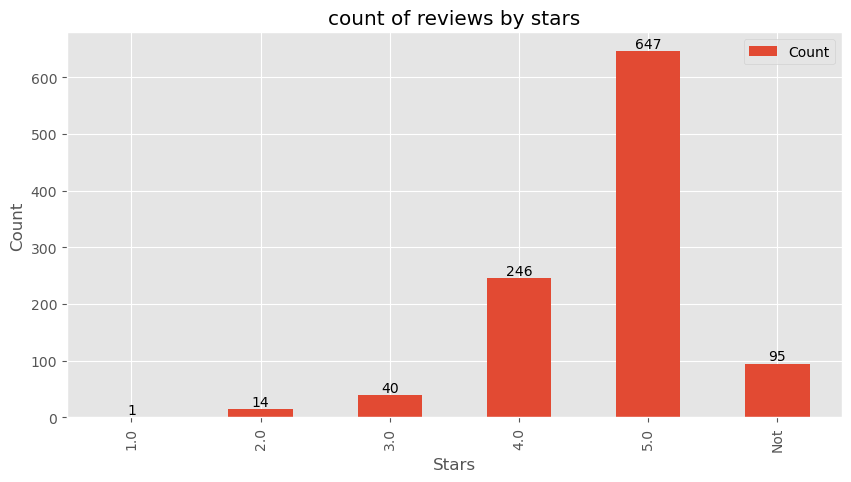

In [13]:
#bar chart count of reviews by stars
df['Ratings'].value_counts().sort_index().plot(kind ='bar',title ='count of reviews by stars', figsize=(10,5))
# Adding labels to each bar
for i, v in enumerate(df['Ratings'].value_counts().sort_index()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.legend(['Count'])

In [14]:
##Basic NLTK
example = df['Content'][5]
print(example)  

Outstanding presidential library. Came to know Richard Nixon far, far better than just Kennedy/Nixon debate and Watergate. Came to appreciate his accomplishments, leadership skills and work ethic better. Agree with President Clinton’s remark at Nixon funeral: “judge Nixon on the totality of his service to America, not just one event (Watergate).”Very meaningful that the presidential library stands a few yards from Nixon’s birthplace, family farm and childhood home.Extremely friendly and nice volunteer staff…who were very sensitive and caring toward my wife who required a wheelchair to experience the library due to walking challenges. So very helpful!!!


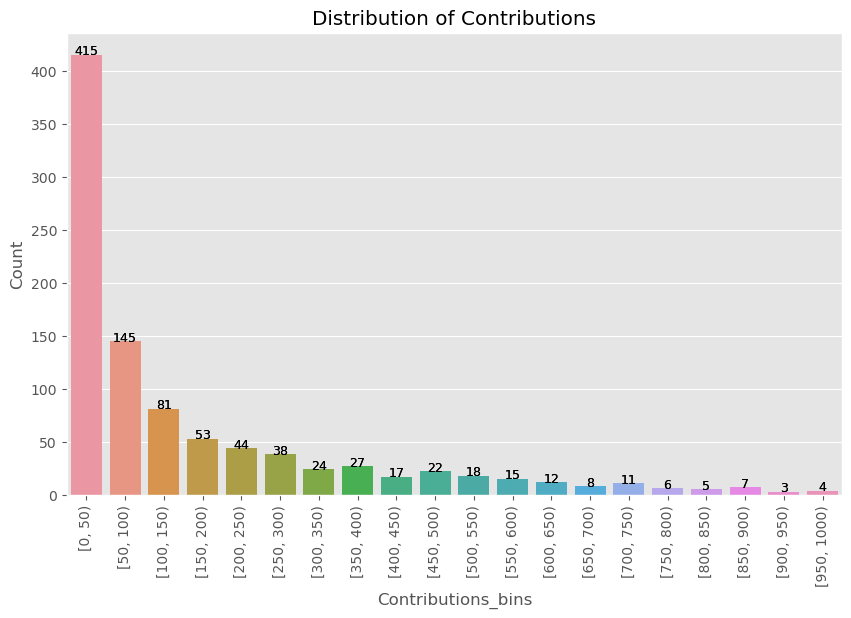

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'Contributions' column to numeric (if it contains non-numeric string values)
df['Contributions'] = pd.to_numeric(df['Contributions'], errors='coerce')

# Remove rows with NaN values in 'Contributions' column
df = df.dropna(subset=['Contributions'])

# Create bins with an increment of 25
bin_size = 50
bins = range(0, int(df['Contributions'].max()) + bin_size, bin_size)

# Bin the 'Contributions' data
df['Contributions_bins'] = pd.cut(df['Contributions'], bins, right=False)

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contributions_bins')
plt.xlabel('Contributions (in bins of 25)')
ax = sns.countplot(data=df, x='Contributions_bins')
plt.ylabel('Count')
plt.title('Distribution of Contributions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count labels on top of each bar as whole numbers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [16]:
#Identifying tokens upto 100
tokens = nltk.word_tokenize(example)
tokens[:100]

['Outstanding',
 'presidential',
 'library',
 '.',
 'Came',
 'to',
 'know',
 'Richard',
 'Nixon',
 'far',
 ',',
 'far',
 'better',
 'than',
 'just',
 'Kennedy/Nixon',
 'debate',
 'and',
 'Watergate',
 '.',
 'Came',
 'to',
 'appreciate',
 'his',
 'accomplishments',
 ',',
 'leadership',
 'skills',
 'and',
 'work',
 'ethic',
 'better',
 '.',
 'Agree',
 'with',
 'President',
 'Clinton',
 '’',
 's',
 'remark',
 'at',
 'Nixon',
 'funeral',
 ':',
 '“',
 'judge',
 'Nixon',
 'on',
 'the',
 'totality',
 'of',
 'his',
 'service',
 'to',
 'America',
 ',',
 'not',
 'just',
 'one',
 'event',
 '(',
 'Watergate',
 ')',
 '.',
 '”',
 'Very',
 'meaningful',
 'that',
 'the',
 'presidential',
 'library',
 'stands',
 'a',
 'few',
 'yards',
 'from',
 'Nixon',
 '’',
 's',
 'birthplace',
 ',',
 'family',
 'farm',
 'and',
 'childhood',
 'home.Extremely',
 'friendly',
 'and',
 'nice',
 'volunteer',
 'staff…who',
 'were',
 'very',
 'sensitive',
 'and',
 'caring',
 'toward',
 'my',
 'wife',
 'who']

In [17]:
#Part of speech tagging for all the tokens (Format - ('part of speech', 'token'))
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Outstanding', 'VBG'),
 ('presidential', 'JJ'),
 ('library', 'NN'),
 ('.', '.'),
 ('Came', 'NN'),
 ('to', 'TO'),
 ('know', 'VB'),
 ('Richard', 'NNP'),
 ('Nixon', 'NNP'),
 ('far', 'RB')]

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Outstanding/VBG
  presidential/JJ
  library/NN
  ./.
  (PERSON Came/NN)
  to/TO
  know/VB
  (PERSON Richard/NNP Nixon/NNP)
  far/RB
  ,/,
  far/RB
  better/JJR
  than/IN
  just/RB
  Kennedy/Nixon/NNP
  debate/NN
  and/CC
  (ORGANIZATION Watergate/NNP)
  ./.
  (PERSON Came/NNP)
  to/TO
  appreciate/VB
  his/PRP$
  accomplishments/NNS
  ,/,
  leadership/NN
  skills/NNS
  and/CC
  work/NN
  ethic/RB
  better/RBR
  ./.
  Agree/JJ
  with/IN
  President/NNP
  (PERSON Clinton/NNP)
  ’/NNP
  s/VBD
  remark/NN
  at/IN
  (ORGANIZATION Nixon/NNP)
  funeral/JJ
  :/:
  “/NN
  judge/NN
  (PERSON Nixon/NNP)
  on/IN
  the/DT
  totality/NN
  of/IN
  his/PRP$
  service/NN
  to/TO
  (GPE America/NNP)
  ,/,
  not/RB
  just/RB
  one/CD
  event/NN
  (/(
  (ORGANIZATION Watergate/NNP)
  )/)
  ./.
  ”/JJ
  Very/RB
  meaningful/JJ
  that/IN
  the/DT
  presidential/JJ
  library/NN
  stands/VBZ
  a/DT
  few/JJ
  yards/NNS
  from/IN
  (PERSON Nixon/NNP)
  ’/NNP
  s/VBD
  birthplace/NN
  ,/,
  family/NN
  far

In [19]:
#VADER Sentiment Score (Valence Aware Dictionary and Sentiment Reasoner )
# we will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

#This uses a "bag of words" approach: 1. Stop words are removed 2. each word is scored and combined to a total score.

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [20]:
#Run the polarity score on example that we parsed above
sia.polarity_scores(example)

{'neg': 0.021, 'neu': 0.702, 'pos': 0.277, 'compound': 0.9814}

In [21]:
#Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Content']
    res[text] = sia.polarity_scores(text)


  0%|          | 0/955 [00:00<?, ?it/s]

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Create empty lists to store sentiment scores
res = {'neg': [], 'neu': [], 'pos': [], 'compound': []}

# Iterate over the data and calculate the sentiment scores for each row
for i, row in df.iterrows():
    text = row['Content']
    scores = sia.polarity_scores(text)
    res['neg'].append(scores['neg'])
    res['neu'].append(scores['neu'])
    res['pos'].append(scores['pos'])
    res['compound'].append(scores['compound'])

# Create a new DataFrame from the sentiment scores
vaders = pd.DataFrame(res)

# Merge the sentiment scores DataFrame with the original DataFrame based on the row index
merged_df = df.join(vaders)

# Now, 'merged_df' contains both the original data and sentiment scores

# Print the entire merged dataset
print(merged_df)

                Name            Address  Contributions  Likes Ratings  \
1            Kathy D                NaN            0.0      0     5.0   
2              dan p       Parkland, FL          114.0      0     4.0   
3           virginia        Visalia, CA            4.0      0     4.0   
4          TulaKitty     Santa Rosa, CA          316.0      0     5.0   
5           yalu1952         Texas, USA            4.0      0     5.0   
...              ...                ...            ...    ...     ...   
1037  sandytravelbug         California          476.0      1     5.0   
1038     sheagoodbye           New York           34.0      2     4.0   
1039       Otter1959  Chicago, Illinois            2.0      3     4.0   
1040      museumgoer    Baton Rouge, LA           94.0      7     5.0   
1041     Culture5354           Reno, NV            1.0     10     4.0   

                                               Headline  \
1                                           Peacemaker    
2    

<function matplotlib.pyplot.show(close=None, block=None)>

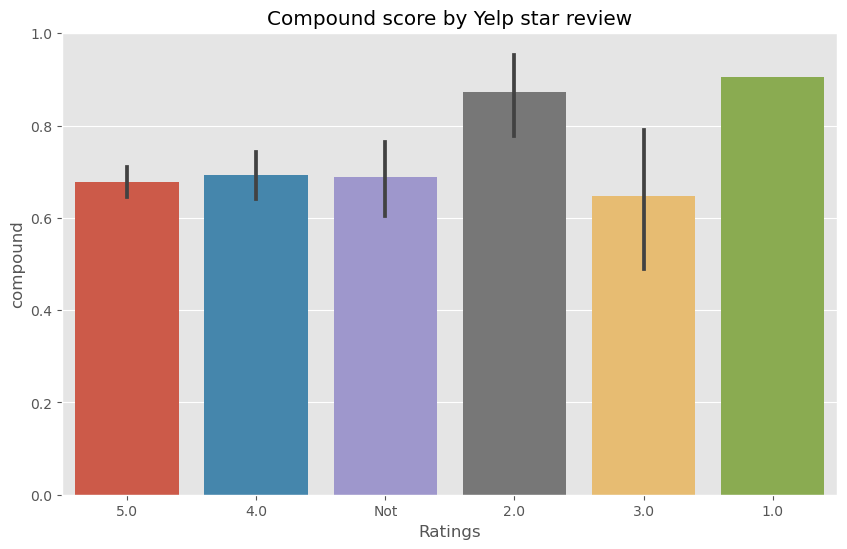

In [23]:
#Plot Vader results (we are plotting the over all compound ratings with respect to the ratings)
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x ='Ratings', y='compound')
plt.title('Compound score by Yelp star review')
plt.show

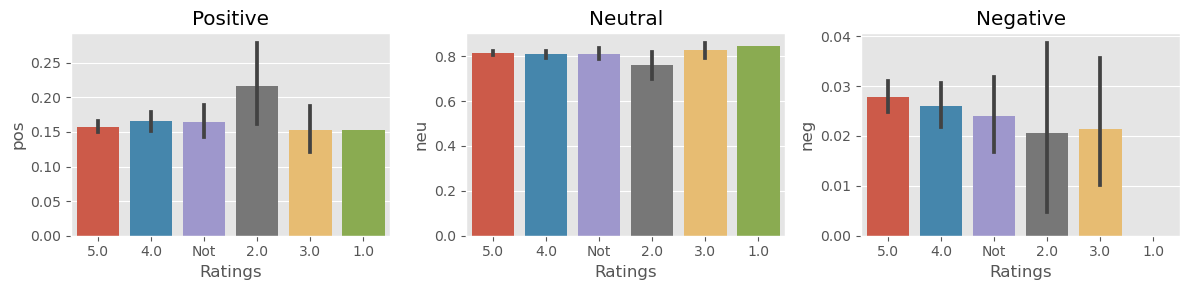

In [24]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=merged_df, x ='Ratings', y ='pos',ax= axs[0])
sns.barplot(data=merged_df, x ='Ratings', y ='neu',ax = axs[1])
sns.barplot(data=merged_df, x ='Ratings', y ='neg',ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

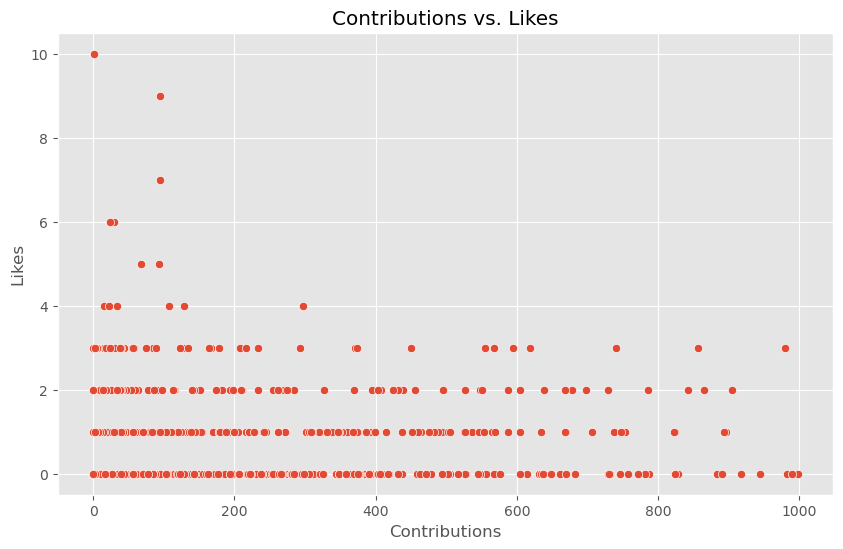

In [25]:
# Assuming 'Contributions' and 'Likes' are columns in your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Contributions', y='Likes')
plt.xlabel('Contributions')
plt.ylabel('Likes')
plt.title('Contributions vs. Likes')
plt.show()

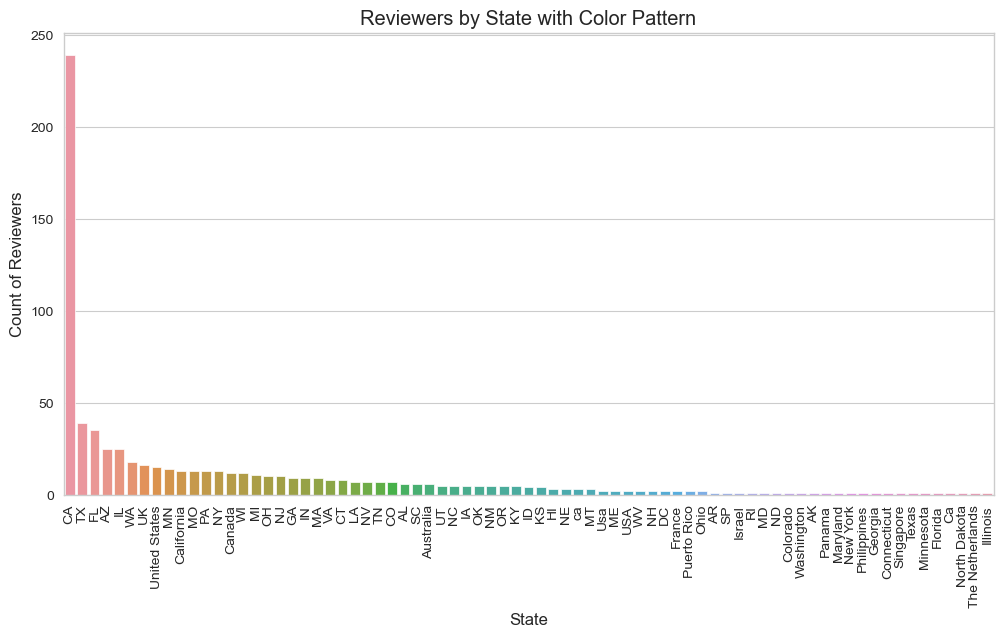

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Address' is the column containing the reviewer's location
# Extract the state information from the 'Address' column
df['State'] = df['Address'].str.extract(r',\s*([\w\s]+)$')

# Aggregate the count of reviewers per state
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Sort states by count
state_counts = state_counts.sort_values(by='Count', ascending=False)

# Create a bar plot to display the count of reviewers per state with a default color palette
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Optional: Set a white grid background style
ax = sns.barplot(data=state_counts, x='State', y='Count')
plt.xlabel('State')
plt.ylabel('Count of Reviewers')
plt.title('Reviewers by State with Color Pattern')
plt.xticks(rotation=90)
plt.show()


In [27]:
#import geopandas as gpd
#import matplotlib.pyplot as plt

# Load the GeoJSON file with state boundaries
#us_states = gpd.read_file('path_to_geojson_file/us-states.geojson')

# Assuming 'state_counts' contains the counts of reviewers per state
# Merge the state boundaries data with the reviewer counts
#merged = us_states.set_index('name').join(state_counts.set_index('State'))

# Plot the choropleth map
#fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#merged.plot(column='Count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#ax.set_title('Reviewers by State')

#plt.show()


100%|██████████████████████████████████████████████████████████████████████████████| 955/955 [00:00<00:00, 1204.73it/s]
C:\ProgramData\miniconda3\envs\SA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


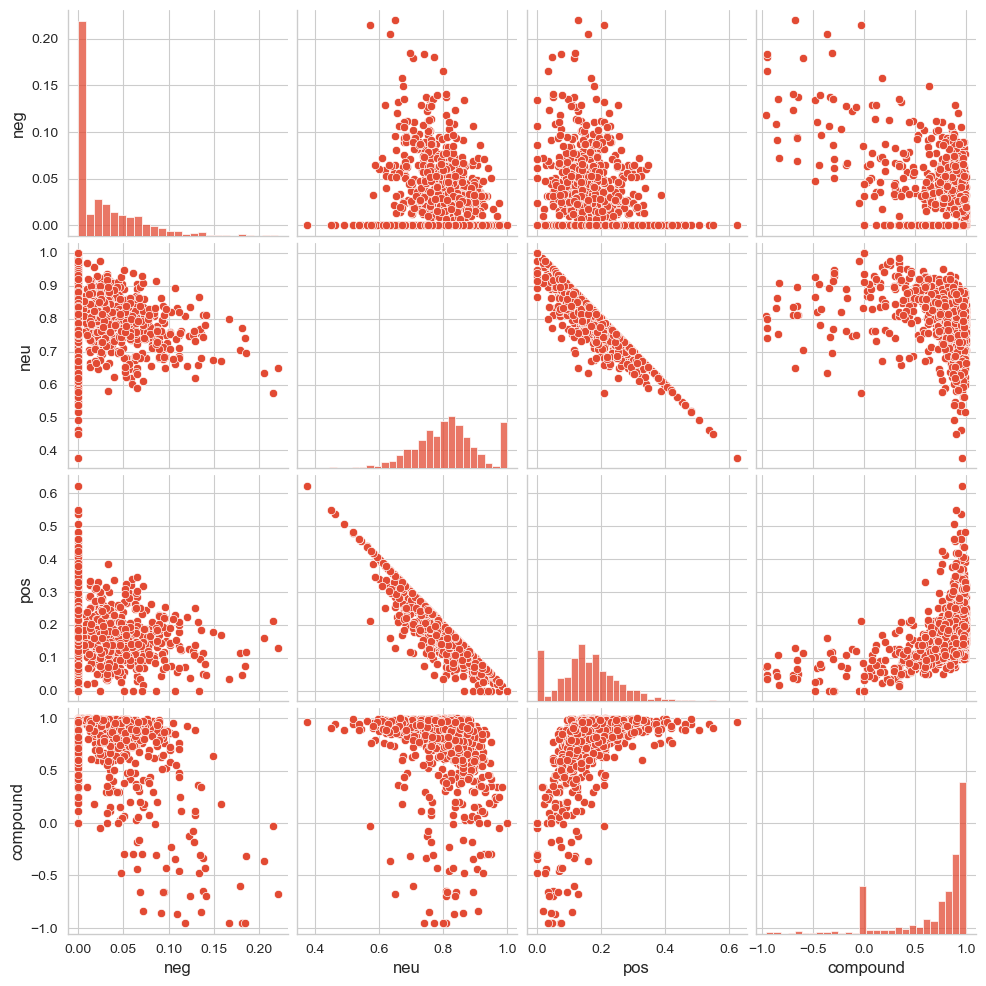

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import seaborn as sns

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Initialize the progress bar with tqdm
tqdm.pandas()

# Create an empty DataFrame to store sentiment scores
res = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])

# Iterate over the data and calculate the sentiment scores for each row
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Content']
    scores = sia.polarity_scores(text)
    scores_df = pd.DataFrame(scores, index=[i])  # Create a DataFrame with an index
    res = pd.concat([res, scores_df], ignore_index=True)

# Create a pairplot to visualize the correlations
sns.pairplot(res)
plt.show()


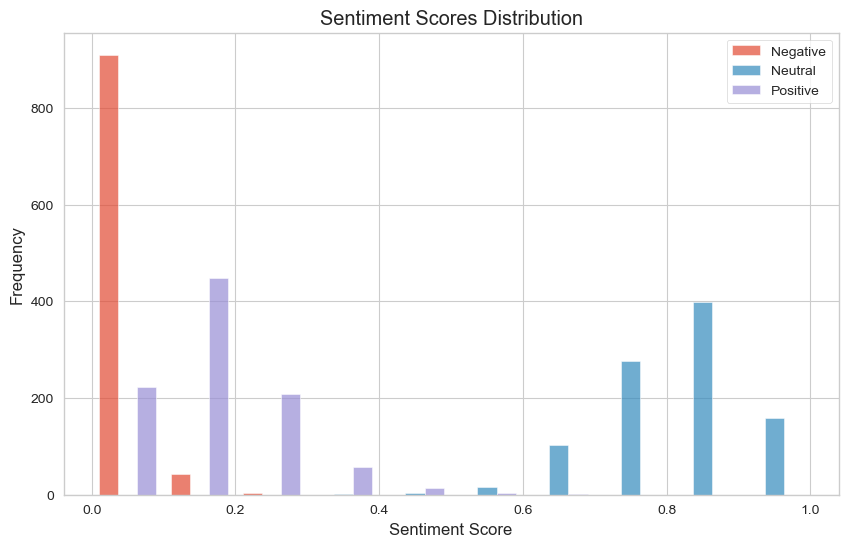

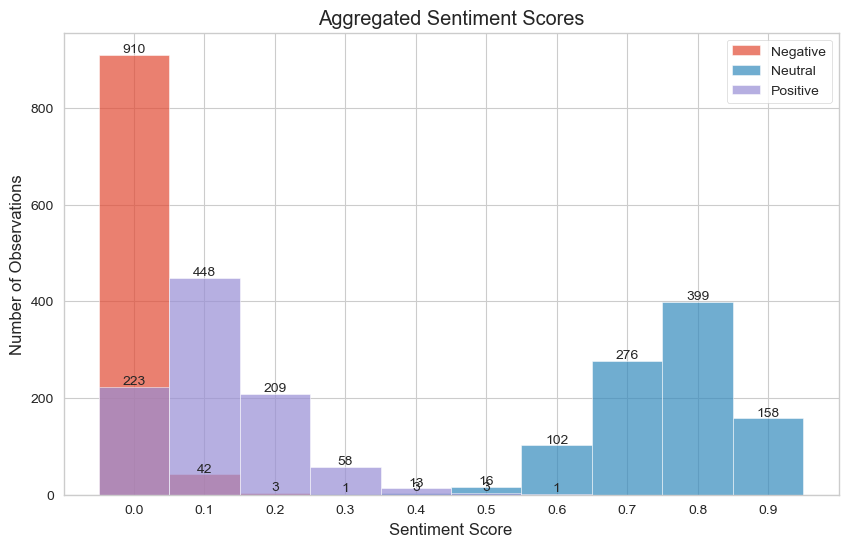

In [29]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Create empty lists to store sentiment scores
neg_scores = []
neu_scores = []
pos_scores = []

# Iterate over the data and calculate the sentiment scores for each row
for _, row in df.iterrows():
    text = row['Content']
    scores = sia.polarity_scores(text)
    neg_scores.append(scores['neg'])
    neu_scores.append(scores['neu'])
    pos_scores.append(scores['pos'])

# Plot sentiment scores in general
plt.figure(figsize=(10, 6))
plt.hist([neg_scores, neu_scores, pos_scores], bins=10, label=['Negative', 'Neutral', 'Positive'], alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Scores Distribution')
plt.legend()

# Create a bar chart for aggregated sentiment scores
plt.figure(figsize=(10, 6))
hist, edges = np.histogram(neg_scores, bins=np.arange(0, 1.1, 0.1))
hist_neu, edges_neu = np.histogram(neu_scores, bins=np.arange(0, 1.1, 0.1))
hist_pos, edges_pos = np.histogram(pos_scores, bins=np.arange(0, 1.1, 0.1))

plt.bar(edges[:-1], hist, width=0.1, align='center', label='Negative', alpha=0.7)
plt.bar(edges_neu[:-1], hist_neu, width=0.1, align='center', label='Neutral', alpha=0.7)
plt.bar(edges_pos[:-1], hist_pos, width=0.1, align='center', label='Positive', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Observations')
plt.title('Aggregated Sentiment Scores')
plt.xticks(edges[:-1], [f'{i:.1f}' for i in edges[:-1]])
plt.legend()

# Add numerical counts on top of each bar, ignoring 0 counts
for x, y in zip(edges[:-1], hist):
    if y != 0:
        plt.text(x, y + 5, str(y), ha='center')
for x, y in zip(edges_neu[:-1], hist_neu):
    if y != 0:
        plt.text(x, y + 5, str(y), ha='center')
for x, y in zip(edges_pos[:-1], hist_pos):
    if y != 0:
        plt.text(x, y + 5, str(y), ha='center')

plt.show()


In [30]:
# Create lists to store the results
polarity_list = []
subjectivity_list = []
sentiment_assessments_list = []

# Iterate over the content column in the DataFrame
for row in df['Content']:
    doc = SA_model(row)

    # Get the sentiment polarity and subjectivity
    polarity = doc._.blob.polarity
    subjectivity = doc._.blob.subjectivity

    # Get the sentiment assessments
    sentiment_assessments = doc._.blob.sentiment_assessments.assessments

    # Append the results to the respective lists
    polarity_list.append(polarity)
    subjectivity_list.append(subjectivity)
    sentiment_assessments_list.append(sentiment_assessments)

# Create a new DataFrame from the results
results_df = pd.DataFrame({
    'Polarity': polarity_list,
    'Subjectivity': subjectivity_list,
    'Sentiment Assessments': sentiment_assessments_list
})

# Print the results DataFrame
print(results_df)

     Polarity  Subjectivity                              Sentiment Assessments
0    0.666667      0.833333  [([wonderful], 1.0, 1.0, None), ([wonderfully,...
1    0.160000      0.473333  [([excellent], 1.0, 1.0, None), ([bad], -0.699...
2    0.171875      0.416667  [([great], 0.8, 0.75, None), ([stretched], -0....
3    0.220374      0.496738  [([second], 0.0, 0.0, None), ([fascinating], 0...
4    0.293385      0.650000  [([outstanding], 0.5, 0.875, None), ([far], 0....
..        ...           ...                                                ...
950  0.170000      0.493333  [([personal], 0.0, 0.3, None), ([extensive], 0...
951  0.250458      0.610577  [([wants], 0.2, 0.1, None), ([most], 0.5, 0.5,...
952  0.066071      0.671429  [([beautiful], 0.85, 1.0, None), ([complex], -...
953  0.304762      0.410317  [([great], 0.8, 0.75, None), ([good], 0.7, 0.6...
954  0.300000      0.400000  [([several], 0.0, 0.0, None), ([best], 1.0, 0....

[955 rows x 3 columns]


In [31]:
## Roberta Pretrained Model
### Use a model trained of a large corpus of data
### Transformer model accounts for the words but also the context realted to other words.

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [32]:
# Load the pre-trained model and tokenizer
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [33]:
#VADER results on example
print(example)
sia.polarity_scores(example)

Outstanding presidential library. Came to know Richard Nixon far, far better than just Kennedy/Nixon debate and Watergate. Came to appreciate his accomplishments, leadership skills and work ethic better. Agree with President Clinton’s remark at Nixon funeral: “judge Nixon on the totality of his service to America, not just one event (Watergate).”Very meaningful that the presidential library stands a few yards from Nixon’s birthplace, family farm and childhood home.Extremely friendly and nice volunteer staff…who were very sensitive and caring toward my wife who required a wheelchair to experience the library due to walking challenges. So very helpful!!!


{'neg': 0.021, 'neu': 0.707, 'pos': 0.272, 'compound': 0.9814}

In [34]:
# Run for Roberta Model
encoded_text = tokenizer(example,padding='max_length', truncation=True, max_length=512, return_tensors='pt')
output = model(**encoded_text)
scores = output.logits[0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
print(scores_dict)

{'roberta_neg': 0.0037140113, 'roberta_neu': 0.030054236, 'roberta_pos': 0.9662318}


In [35]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,padding='max_length', truncation=True, max_length=512, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
    return scores_dict

In [36]:
# Initialize an empty list to store the results
results = []
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Content']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    
    # Rename VADER keys to avoid naming conflicts
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    
    # Combine VADER and Roberta results into a single dictionary
    both = {**vader_result_rename, **roberta_result}
    
    # Append the result to the list
    results.append(both)
    
# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

100%|████████████████████████████████████████████████████████████████████████████████| 955/955 [07:23<00:00,  2.15it/s]

     vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0        0.000      0.719      0.281          0.9415     0.002081   
1        0.000      0.621      0.379          0.9189     0.004362   
2        0.000      0.769      0.231          0.7840     0.001729   
3        0.026      0.833      0.141          0.9494     0.072607   
4        0.021      0.707      0.272          0.9814     0.003714   
..         ...        ...        ...             ...          ...   
950      0.012      0.875      0.113          0.9033     0.003745   
951      0.066      0.793      0.141          0.9654     0.053535   
952      0.053      0.839      0.108          0.7906     0.009045   
953      0.020      0.667      0.313          0.9961     0.005956   
954      0.000      0.815      0.185          0.8173     0.002552   

     roberta_neu  roberta_pos  
0       0.020016     0.977903  
1       0.037591     0.958047  
2       0.017027     0.981245  
3       0.148063     0.779329  
4       0.0

In [37]:
# Merge the original dataset with the results DataFrame 
merged_df = df.merge(results_df, left_index=True, right_index=True)

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('tripadvisor_reviews_with_results.xlsx', index=False)

In [38]:
print(merged_df)

             Name           Address  Contributions  Likes Ratings  \
1         Kathy D               NaN            0.0      0     5.0   
2           dan p      Parkland, FL          114.0      0     4.0   
3        virginia       Visalia, CA            4.0      0     4.0   
4       TulaKitty    Santa Rosa, CA          316.0      0     5.0   
5        yalu1952        Texas, USA            4.0      0     5.0   
..            ...               ...            ...    ...     ...   
950      Gloria F  Green Valley, AZ           27.0      0     5.0   
951  Puttermutt17      Glendora, CA           87.0      0     5.0   
952      Tuckered       South Texas           19.0      1     5.0   
953        BijonV     Ypsilanti, MI           43.0      0     5.0   
954        vnbpsb   Bridgewater, NJ           27.0      1     5.0   

                                              Headline  \
1                                          Peacemaker    
2                             Nixon Library and Museum 

In [39]:
merged_df.columns

Index(['Name', 'Address', 'Contributions', 'Likes', 'Ratings', 'Headline',
       'Content', 'Contributions_bins', 'State', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],
      dtype='object')

C:\ProgramData\miniconda3\envs\SA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


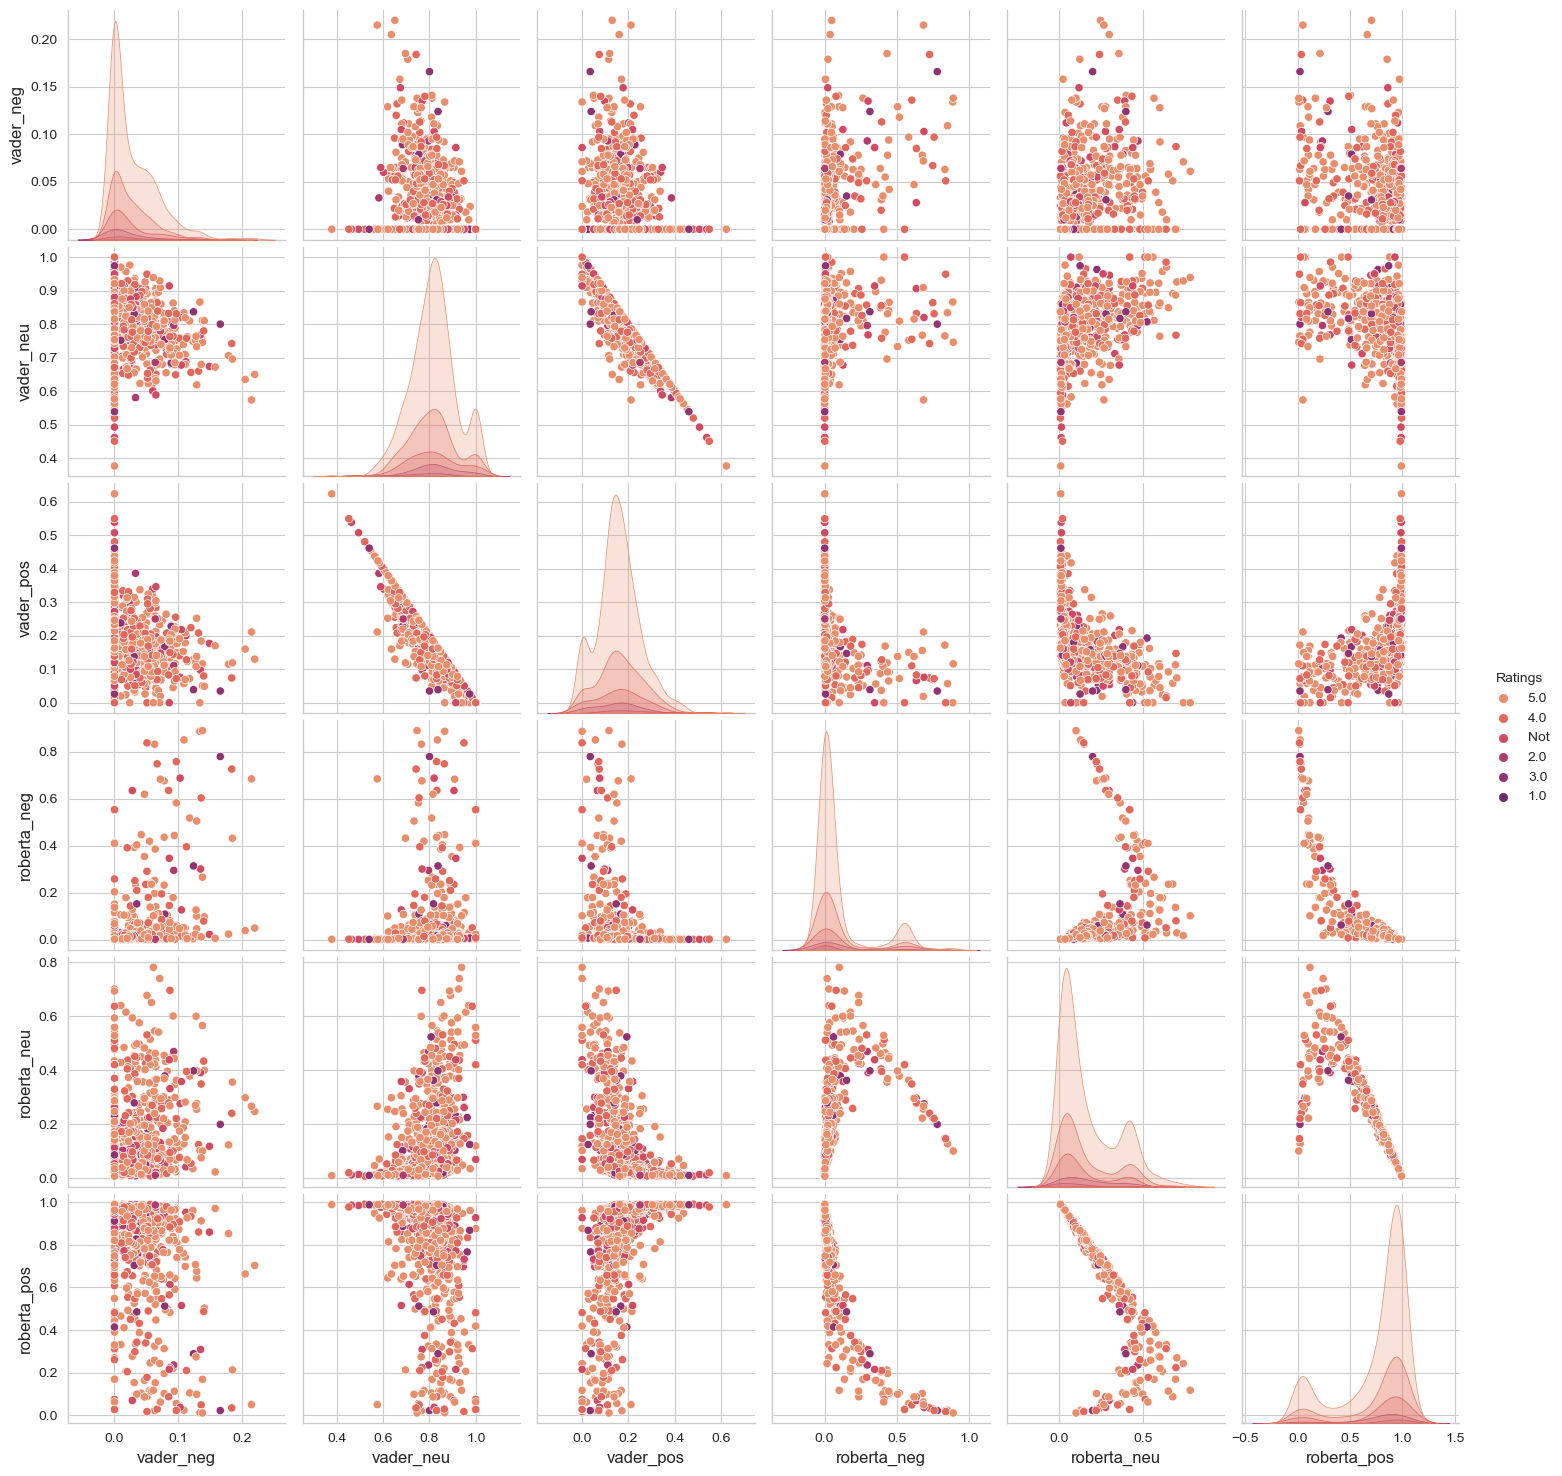

In [52]:
#Compare Scores between models
sns.pairplot(data=merged_df,
            vars = ['vader_neg', 'vader_neu',
       'vader_pos', 'roberta_neg', 'roberta_neu',
       'roberta_pos'], hue = 'Ratings', palette='flare')
plt.show()

In [41]:
#Review Examples
##Positive 1-Star and Negative 5=Star Review
##This is for roberta model where the rating is 1 however rating score is +ve

# Check if there are any rows with Ratings equal to 1
positive_1_star_reviews = merged_df.query('Ratings == 1 or Ratings == 2')

if not positive_1_star_reviews.empty:
    # Sort the positive 1-star reviews by roberta_pos in descending order
    sorted_reviews = positive_1_star_reviews.sort_values('roberta_pos', ascending=False)
    
    # Get the content of the top review
    top_positive_1_star_review = sorted_reviews['Content'].values[0]
    
    print(top_positive_1_star_review)
else:
    print("No positive 1-star or 2-star reviews found.")


No positive 1-star or 2-star reviews found.


In [42]:
##This is for vader model where the rating is 1 however rating score is +ve
##This model uses bag of words technique
# Check if there are any rows with Ratings equal to 1
positive_1_star_reviews_vader = merged_df.query('Ratings == 1 or Ratings == 2')

if not positive_1_star_reviews_vader.empty:
    # Sort the positive 1-star reviews by vader_pos in descending order
    sorted_reviews_vader = positive_1_star_reviews_vader.sort_values('vader_pos', ascending=False)
    
    # Get the content of the top review
    top_positive_1_star_review_vader = sorted_reviews_vader['Content'].values[0]
    
    print(top_positive_1_star_review_vader)
else:
    print("No positive 1-star or 2-star reviews found for Vader model.")


No positive 1-star or 2-star reviews found for Vader model.


In [43]:
#negative sentiment 5-star review

# Check if there are any rows with Ratings equal to 5
negative_5_star_reviews_roberta = merged_df.query('Ratings == 5 or Ratings == 4')

if not negative_5_star_reviews_roberta.empty:
    # Sort the negative 5-star reviews by roberta_neg in descending order
    sorted_reviews_roberta = negative_5-star_reviews_roberta.sort_values('roberta_neg', ascending=False)
    
    # Get the content of the top review
    top_negative_5_star_review_roberta = sorted_reviews_roberta['Content'].values[0]
    
    print(top_negative_5_star_review_roberta)
else:
    print("No negative sentiment 5-star or 4-star reviews found for Roberta model.")


No negative sentiment 5-star or 4-star reviews found for Roberta model.


In [44]:
#negative sentiment 5-star review in vader model

# Check if there are any rows with Ratings equal to 5 or 4
negative_5_and_4_star_reviews_vader = merged_df.query('Ratings == 5 or Ratings == 4')

if not negative_5_and_4_star_reviews_vader.empty:
    # Sort the 5 and 4-star reviews by 'vader_neg' in descending order
    sorted_reviews_vader = negative_5_and_4_star_reviews_vader.sort_values('vader_neg', ascending=False)
    
    # Get the content of the top review
    top_negative_5_and_4_star_review_vader = sorted_reviews_vader['Content'].values[0]
    
    print(top_negative_5_and_4_star_review_vader)
else:
    print("No negative sentiment 5-star or 4-star reviews found for Vader model.")


No negative sentiment 5-star or 4-star reviews found for Vader model.


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Word	Frequency
library	334
museum	332
time	247
history	238
presidential	206
great	204
interesting	187
home	184
life	179
exhibits	169
place	165
visit	164
helicopter	157
grounds	153
good	150
beautiful	139
many	139
house	114
worth	113
hours	113
tour	105
presidency	103
lot	101
birthplace	96
more	93
nice	83
displays	81
president	79
man	79
years	78
informative	77
much	77
libraries	74
things	72
exhibit	71
family	69
childhood	67
information	65
day	64
excellent	63
political	61
site	61
gardens	61
trip	58
accomplishments	57
first	57
docents	56
few	54
office	54
one	53


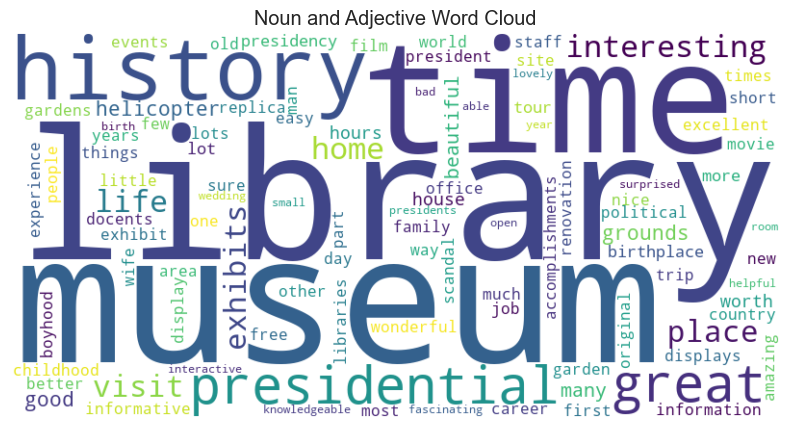

In [45]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import pandas as pd

# Initialize NLTK VADER
sia = SentimentIntensityAnalyzer()

# Initialize Hugging Face Roberta model and tokenizer
model_name = 'roberta-base'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Initialize a list of words to remove
words_to_remove = ["nixon", "museum"]

# Initialize spaCy with a language model (English)
nlp = spacy.load("en_core_web_sm")

# Initialize empty word frequency counters for nouns and adjectives
noun_adjective_counts = Counter()

for i, row in df.iterrows():
    text = row['Content']
    vader_result = sia.polarity_scores(text)

    # Truncate or split the text to fit within the model's maximum sequence length
    max_seq_length = model.config.max_position_embeddings
    if len(text) > max_seq_length:
        text = text[:max_seq_length]  # Truncate the text

    roberta_result = model(**tokenizer(text, return_tensors='pt', padding=True, truncation=True))

    # Process the text with spaCy to extract nouns and adjectives and update the word frequency counts
    doc = nlp(text)
    noun_adjective_tokens = [token.text.lower() for token in doc if token.pos_ in ['NOUN', 'ADJ']]
    noun_adjective_counts.update(noun_adjective_tokens)

# Get the top 50 words with their frequencies in increasing order
top_50_words = noun_adjective_counts.most_common(50)

# Print the table
print("Word\tFrequency")
for word, frequency in top_50_words:
    print(f"{word}\t{frequency}")

# Create a word cloud for the combined noun and adjective counts
def generate_word_cloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_word_cloud(noun_adjective_counts, "Noun and Adjective Word Cloud")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


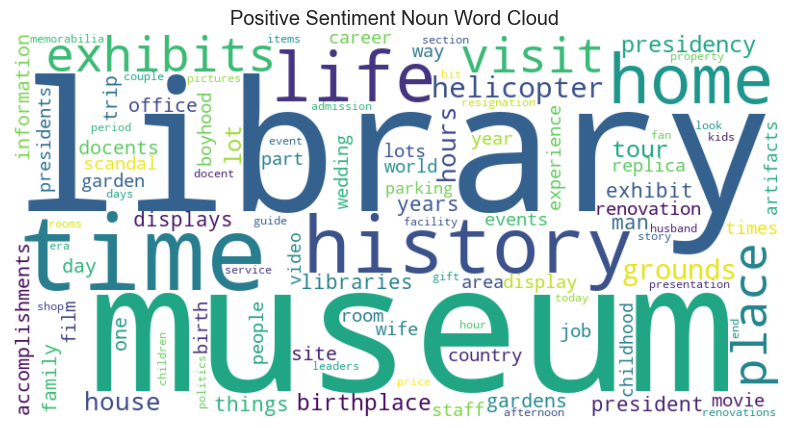

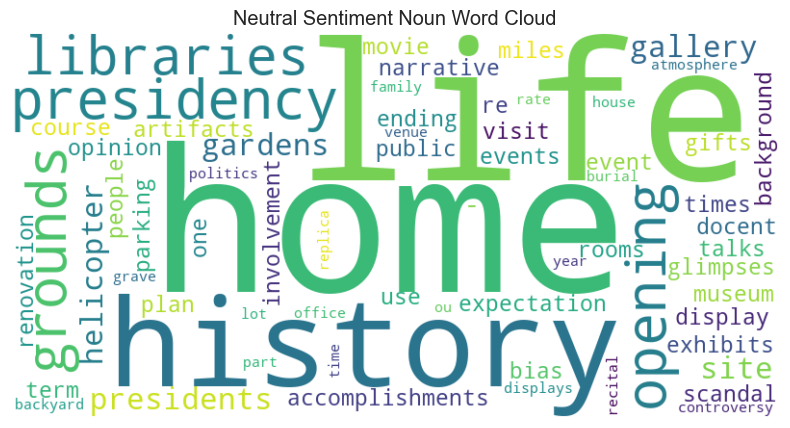

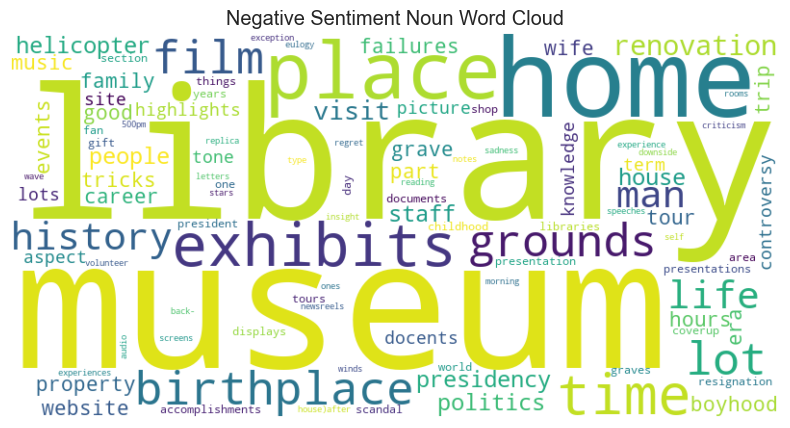

In [46]:
from collections import Counter  # Import the Counter class
from wordcloud import WordCloud  # Import WordCloud
import matplotlib.pyplot as plt
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy

# Initialize NLTK VADER
sia = SentimentIntensityAnalyzer()

# Initialize Hugging Face Roberta model and tokenizer
model_name = 'roberta-base'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Initialize a list of words to remove
words_to_remove = ["nixon", "museum"]

# Initialize spaCy with a language model (English)
nlp = spacy.load("en_core_web_sm")

# Initialize empty word frequency counters for each sentiment category
positive_word_counts = Counter()
neutral_word_counts = Counter()
negative_word_counts = Counter()

for i, row in df.iterrows():
    text = row['Content']
    vader_result = sia.polarity_scores(text)

    # Truncate or split the text to fit within the model's maximum sequence length
    max_seq_length = model.config.max_position_embeddings
    if len(text) > max_seq_length:
        text = text[:max_seq_length]  # Truncate the text

    roberta_result = model(**tokenizer(text, return_tensors='pt', padding=True, truncation=True))

    # Determine sentiment category (positive, neutral, or negative)
    if vader_result['compound'] >= 0.05:
        sentiment_category = 'positive'
    elif vader_result['compound'] <= -0.05:
        sentiment_category = 'negative'
    else:
        sentiment_category = 'neutral'

    # Process the text with spaCy to extract nouns and update the word frequency counts
    doc = nlp(text)
    nouns = [token.text.lower() for token in doc if token.pos_ == 'NOUN']
    word_counts = Counter(nouns)

    if sentiment_category == 'positive':
        positive_word_counts.update(word_counts)
    elif sentiment_category == 'negative':
        negative_word_counts.update(word_counts)
    else:
        neutral_word_counts.update(word_counts)

# Create word clouds for each sentiment category
def generate_word_cloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_word_cloud(positive_word_counts, "Positive Sentiment Noun Word Cloud")
generate_word_cloud(neutral_word_counts, "Neutral Sentiment Noun Word Cloud")
generate_word_cloud(negative_word_counts, "Negative Sentiment Noun Word Cloud")


In [47]:
# Hugging Face transformers pipeline

from transformers import pipeline, AutoTokenizer
import pandas as pd  

# Load the sentiment analysis pipeline and tokenizer
sent_pipeline = pipeline("sentiment-analysis")
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Define the maximum sequence length
max_sequence_length = 512  # Adjust to the appropriate value for your model

# Iterate through the comments and calculate sentiment scores
for index, row in merged_df.iterrows():
    comment = row['Content']
    
    # Truncate or split the comment to match the model's input size
    if len(comment) > max_sequence_length:
        comment = comment[:max_sequence_length]  # Truncate the comment
    
    # Tokenize the comment and ensure it matches the model's input size
    encoding = tokenizer(comment, return_tensors='pt', padding='max_length', truncation=True, max_length=max_sequence_length)
    
    # Analyze sentiment using the pipeline with the tokenized input
    input_ids = encoding.input_ids.tolist()  # Convert input_ids to a list
    
    # Use a list of dictionaries for input
    input_data = [{'text': comment}]  # 'text' is the key expected by the pipeline
    sentiment = sent_pipeline(input_data)
    
    # The sentiment variable will contain a list of dictionaries, where each dictionary contains 'label' and 'score'
    # You can extract the 'score' for the first label (positive or negative)
    sentiment_score = sentiment[0]['score']
    merged_df.at[index, 'sentiment_score'] = sentiment_score

# Now, merged_df contains the sentiment scores in the 'sentiment_score' column
print(merged_df)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


             Name           Address  Contributions  Likes Ratings  \
1         Kathy D               NaN            0.0      0     5.0   
2           dan p      Parkland, FL          114.0      0     4.0   
3        virginia       Visalia, CA            4.0      0     4.0   
4       TulaKitty    Santa Rosa, CA          316.0      0     5.0   
5        yalu1952        Texas, USA            4.0      0     5.0   
..            ...               ...            ...    ...     ...   
950      Gloria F  Green Valley, AZ           27.0      0     5.0   
951  Puttermutt17      Glendora, CA           87.0      0     5.0   
952      Tuckered       South Texas           19.0      1     5.0   
953        BijonV     Ypsilanti, MI           43.0      0     5.0   
954        vnbpsb   Bridgewater, NJ           27.0      1     5.0   

                                              Headline  \
1                                          Peacemaker    
2                             Nixon Library and Museum 

In [48]:
import pandas as pd

# Assuming you have your data in a DataFrame called 'merged_df'
# Calculate the difference between 'vader_compound' and 'sentiment_score'
merged_df['score_difference'] = merged_df['vader_compound'] - merged_df['sentiment_score']

# Create a new column to store the comparison result
merged_df['comparison'] = merged_df['score_difference'].apply(lambda x: 'Vader Higher' if x > 0 else 'Sentiment Higher' if x < 0 else 'Equal')

# Display the result
print(merged_df[['vader_compound', 'sentiment_score', 'score_difference', 'comparison']])


     vader_compound  sentiment_score  score_difference        comparison
1            0.9189         0.999853         -0.080953  Sentiment Higher
2            0.7840         0.999874         -0.215874  Sentiment Higher
3            0.9494         0.998915         -0.049515  Sentiment Higher
4            0.9814         0.998806         -0.017406  Sentiment Higher
5            0.8717         0.999689         -0.127989  Sentiment Higher
..              ...              ...               ...               ...
950          0.9033         0.999874         -0.096574  Sentiment Higher
951          0.9654         0.999606         -0.034206  Sentiment Higher
952          0.7906         0.998576         -0.207976  Sentiment Higher
953          0.9961         0.999819         -0.003719  Sentiment Higher
954          0.8173         0.769278          0.048022      Vader Higher

[872 rows x 4 columns]


In [49]:
# Export the results_df DataFrame to an Excel file
merged_df.to_excel("tripadvisor_results_huggingface&Vader.xlsx", index=False)

In [50]:
#download excel
excel_filename = "tripadvisor_results_huggingface&Vader.xlsx"
display(FileLink(excel_filename))

C:\Users\naren\OneDrive\Desktop\Nixon library Project\tripadvisor_results_huggingface&Vader.xlsx